# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Amelia Yunisa
- **Email:** a180xbm054@devacademy.id
- **ID Dicoding:** A180XBM054

## Menentukan Pertanyaan Bisnis

1. Bagaimana cuaca (cerah, hujan) mempengaruhi jumlah sepeda yang dipinjam?
2. Apa perbedaan jumlah peminjaman sepeda antara hari kerja dan akhir pekan?

## Import Semua Packages/Library yang Digunakan

In [22]:
# 0. Import Library
import pandas as pd  # Manipulasi data
import numpy as np  # Operasi numerik
import matplotlib.pyplot as plt  # Visualisasi
import seaborn as sns  # Visualisasi lebih menarik

## Data Wrangling

### Gathering Data

In [23]:

# Load dataset
df = pd.read_csv("data/hour.csv")  # Data per jam
df.head()


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:** Berdasarkan output di atas, terdapat beberapa kolom utama dalam dataset yang dapat dianalisis, antara lain:

1. instant : Indeks unik untuk setiap entri data.
2. dteday : Tanggal peminjaman sepeda. Dalam data ini, semua baris berasal dari 1 Januari 2011.
3. season : Musim saat data dicatat (1 = Musim Semi, 2 = Musim Panas, 3 = Musim Gugur, 4 = Musim Dingin). Data ini berada di musim semi.
4. yr : Tahun data dicatat (0 = 2011, 1 = 2012).
5. mnth : Bulan pencatatan (1 = Januari, 2 = Februari, dst.). Semua data berasal dari bulan Januari.
6. hr : Jam dalam sehari (0 - 23). Data ini mencakup jam 00:00 hingga 04:00.
7. holiday : Indikator hari libur (0 = Bukan hari libur, 1 = Hari libur). Data ini menunjukkan bukan hari libur.
8. weekday : Hari dalam seminggu (0 = Minggu, 1 = Senin, dst.). Nilainya 6, berarti data diambil pada hari Sabtu.
9. workingday : Indikator hari kerja (0 = Bukan hari kerja, 1 = Hari kerja). Karena nilainya 0, ini adalah hari libur akhir pekan.
10. weathersit : Kondisi cuaca saat pencatatan (1 = Cerah, 2 = Berawan, 3 = Hujan, 4 = Cuaca buruk). Semua baris menunjukkan nilai 1, yang berarti cerah atau sedikit berawan.
11. temp : Suhu dalam skala normalisasi (0 - 1). Dalam data ini berkisar antara 0.22 - 0.24, yang berarti suhunya cukup rendah.
12. atemp : Suhu yang terasa (juga dalam skala normalisasi).
13. hum : Kelembaban udara (0 - 1). Data ini memiliki kelembaban tinggi (0.75 - 0.81).
14. windspeed : Kecepatan angin (0 - 1). Semua data menunjukkan 0.0, artinya tidak ada angin saat itu.
15. casual : Jumlah pengguna sepeda yang tidak terdaftar.
16. registered : Jumlah pengguna sepeda yang terdaftar.
17. cnt : Total peminjaman sepeda (cnt = casual + registered).

### Assessing Data

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


**Insight:**
Jumlah data pada hour_df telah lengkap atau dengan kata lain tidak ada missing value di dalamnya. Akan tetapi, terdapat kesalahan tipe data untuk kolom dteday. Kolom tersebut harusnya direpresentasikan sebagai tipe data datetime, bukan object (ini digunakan untuk tipe data string).

In [25]:
print("Jumlah duplikasi: ", df.duplicated().sum())

Jumlah duplikasi:  0


**Insight:** tidak ada data yang terduplikasi dalam dataset.

In [26]:
df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

**Insight:** tidak ada keanehan pada hasil tersebut. Ini menunjukkan tidak terdapat missing value.

### Cleaning Data

In [27]:
datetime_columns = ["dteday"]

for column in datetime_columns:
  df[column] = pd.to_datetime(df[column])

  df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

**Insight:**

 Hasil output df.info() menunjukkan bahwa dataset memiliki 17379 baris dan 19 kolom dengan berbagai tipe data, termasuk int64, float64, datetime64, category, dan object. Kolom dteday berhasil dikonversi ke datetime64[ns], memungkinkan analisis berbasis waktu. Tidak ada data yang hilang maupun duplikasi.

## Exploratory Data Analysis (EDA)

### Explore ...

In [28]:
df.describe()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


**Insight:**
1. Distribusi Data
- Dataset memiliki 17379 entri, dan tidak ada data yang hilang.
- Rata-rata suhu (temp) adalah 0.497, dengan minimum 0.02 dan maksimum 1.0 (kemungkinan dinormalisasi).
- Kelembaban (hum) berkisar antara 0.0 hingga 1.0, dengan median 0.4848, menunjukkan variasi kelembaban cukup merata.
- Kecepatan angin (windspeed) memiliki nilai maksimum 0.8507, dengan median 0.1940, menunjukkan sebagian besar data memiliki kecepatan angin yang relatif rendah.

2. Pola Pemakaian Sepeda
- Rata-rata jumlah peminjaman sepeda total (cnt) adalah 171, dengan minimum 1 dan maksimum 642.
- Peminjaman sepeda oleh pengguna terdaftar (registered) jauh lebih tinggi (rata-rata 153) dibandingkan pengguna kasual (casual) yang hanya sekitar 35. Ini menunjukkan mayoritas peminjam adalah pelanggan tetap.

3. Waktu dan Musim
- Dataset mencakup dua tahun (2011–2012), dengan median tanggal di sekitar Januari 2012.
- Variabel season menunjukkan nilai minimum 1 dan maksimum 4, mencakup semua musim.
- Variabel hr berkisar antara 0 hingga 23, menunjukkan data mencakup seluruh jam dalam sehari.

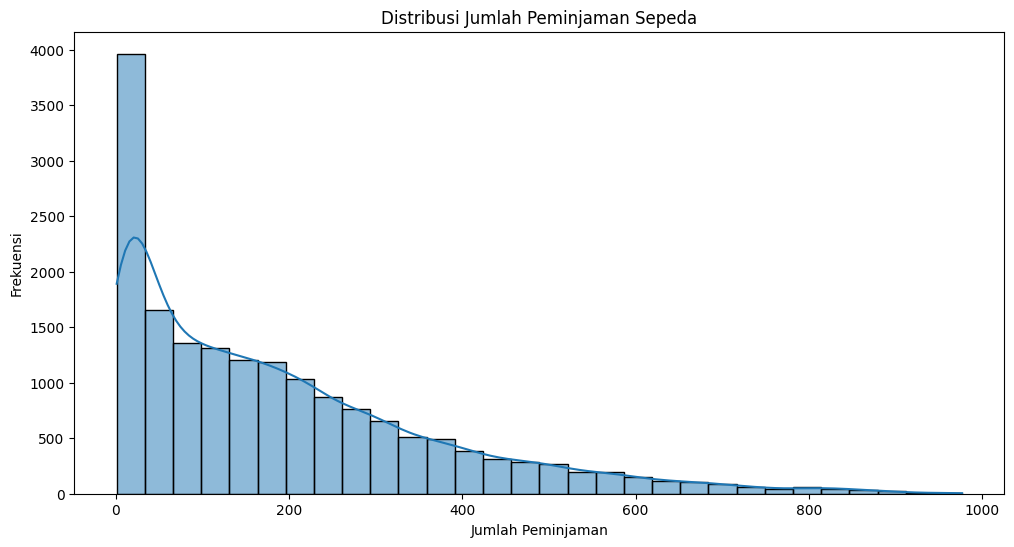

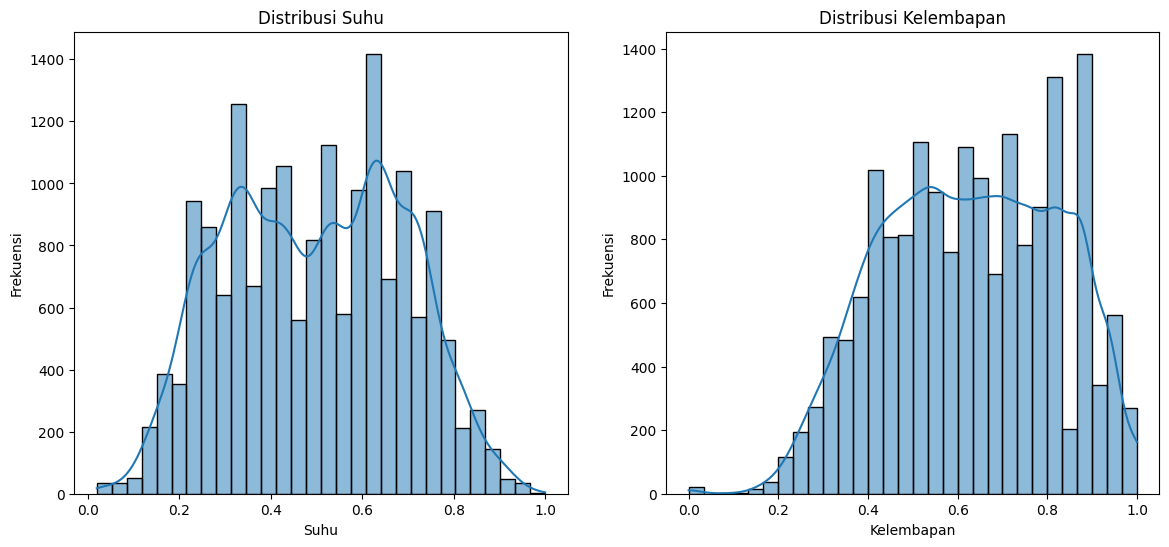

In [30]:
## Analisis Distribusi Data
plt.figure(figsize=(12, 6))
sns.histplot(df["cnt"], bins=30, kde=True)
plt.title("Distribusi Jumlah Peminjaman Sepeda")
plt.xlabel("Jumlah Peminjaman")
plt.ylabel("Frekuensi")
plt.show()

# Analisis distribusi tambahan
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
sns.histplot(df["temp"], bins=30, kde=True, ax=axes[0])
axes[0].set_title("Distribusi Suhu")
axes[0].set_xlabel("Suhu")
axes[0].set_ylabel("Frekuensi")

sns.histplot(df["hum"], bins=30, kde=True, ax=axes[1])
axes[1].set_title("Distribusi Kelembapan")
axes[1].set_xlabel("Kelembapan")
axes[1].set_ylabel("Frekuensi")
plt.show()

**Insight:**

1. Distribusi Jumlah Peminjaman Sepeda
- Distribusi peminjaman sepeda menunjukkan apakah ada kecenderungan jam tertentu lebih ramai atau tidak.

2. Distribusi Suhu dan Kelembapan
- Suhu dan kelembapan bisa memengaruhi kenyamanan pengguna dalam menggunakan sepeda.

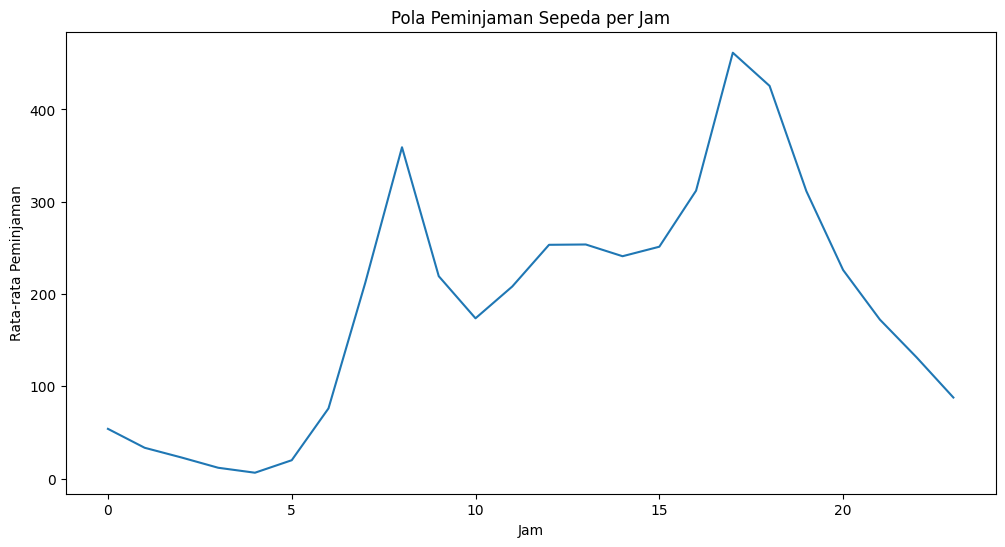

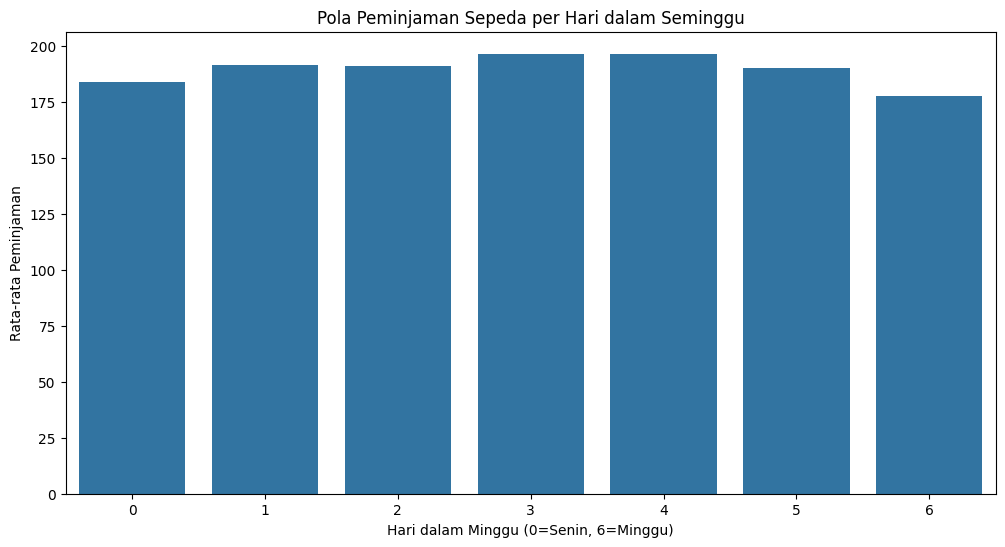

In [31]:
## Analisis Time Series - 
df["dteday"] = pd.to_datetime(df["dteday"])
df["hour"] = df["hr"]

# Pola peminjaman per jam
plt.figure(figsize=(12, 6))
sns.lineplot(x="hour", y="cnt", data=df.groupby("hour")["cnt"].mean().reset_index())
plt.title("Pola Peminjaman Sepeda per Jam")
plt.xlabel("Jam")
plt.ylabel("Rata-rata Peminjaman")
plt.show()

# Pola peminjaman per hari dalam seminggu
df["weekday"] = df["dteday"].dt.dayofweek
plt.figure(figsize=(12, 6))
sns.barplot(x="weekday", y="cnt", data=df.groupby("weekday")["cnt"].mean().reset_index())
plt.title("Pola Peminjaman Sepeda per Hari dalam Seminggu")
plt.xlabel("Hari dalam Minggu (0=Senin, 6=Minggu)")
plt.ylabel("Rata-rata Peminjaman")
plt.show()



**Insight:**

- Peminjaman sepeda lebih tinggi pada jam sibuk (pagi dan sore), sesuai dengan jadwal kerja dan sekolah.
- Hari kerja memiliki pola peminjaman yang lebih teratur, sedangkan akhir pekan lebih bervariasi.

## Visualization & Explanatory Analysis

### Pertanyaan 1:

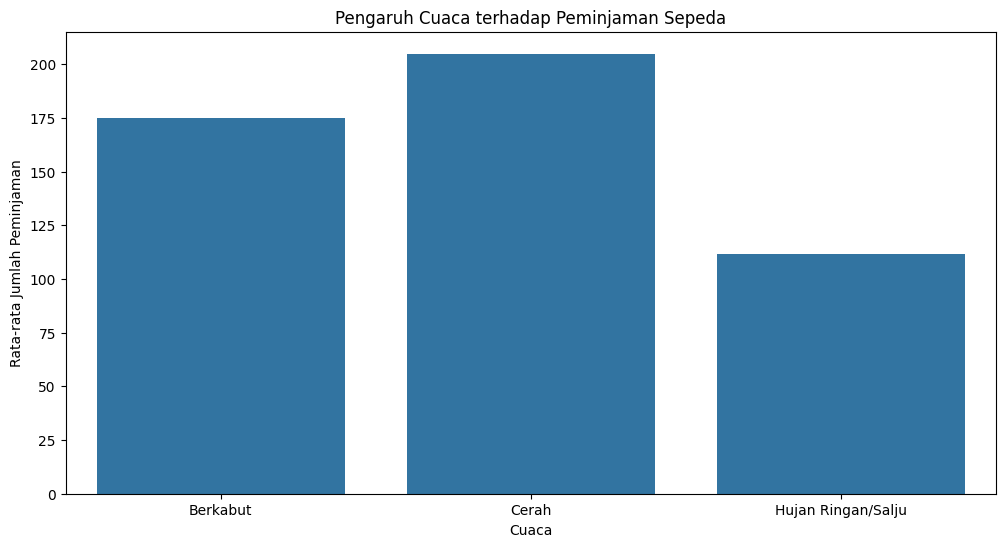

Penurunan peminjaman saat hujan dibandingkan cuaca cerah: 45.54%


In [32]:
## Pengaruh Cuaca terhadap Jumlah Peminjaman Sepeda
cuaca_labels = {1: "Cerah", 2: "Berkabut", 3: "Hujan Ringan/Salju"}
df["weathersit_label"] = df["weathersit"].map(cuaca_labels)
plt.figure(figsize=(12, 6))
sns.barplot(x="weathersit_label", y="cnt", data=df.groupby("weathersit_label")["cnt"].mean().reset_index())
plt.title("Pengaruh Cuaca terhadap Peminjaman Sepeda")
plt.xlabel("Cuaca")
plt.ylabel("Rata-rata Jumlah Peminjaman")
plt.show()

# Analisis Kuantitatif: Persentase perubahan peminjaman berdasarkan cuaca
weather_avg = df.groupby("weathersit")["cnt"].mean()
clear_vs_rain = ((weather_avg[1] - weather_avg[3]) / weather_avg[1]) * 100
print(f"Penurunan peminjaman saat hujan dibandingkan cuaca cerah: {clear_vs_rain:.2f}%")


**Insight:**
- Peminjaman sepeda turun drastis saat cuaca buruk. Perusahaan bisa menyiapkan perlindungan ekstra (jas hujan, tempat berteduh).

### Pertanyaan 2:

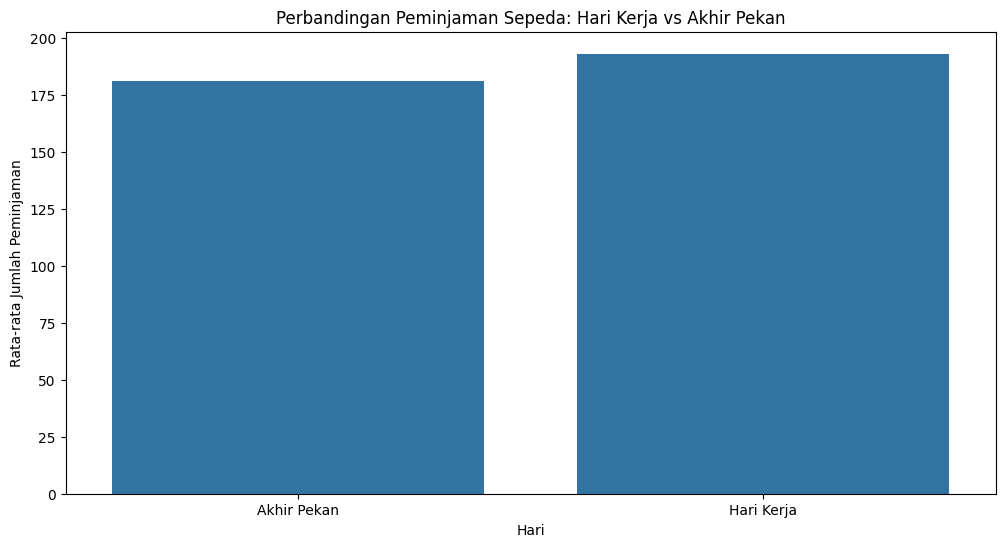

Selisih rata-rata peminjaman antara hari kerja dan akhir pekan: 11.80 sepeda.


In [33]:
## Perbandingan Pola Peminjaman: Hari Kerja vs Akhir Pekan
df["workingday_label"] = df["workingday"].map({1: "Hari Kerja", 0: "Akhir Pekan"})
plt.figure(figsize=(12, 6))
sns.barplot(x="workingday_label", y="cnt", data=df.groupby("workingday_label")["cnt"].mean().reset_index())
plt.title("Perbandingan Peminjaman Sepeda: Hari Kerja vs Akhir Pekan")
plt.xlabel("Hari")
plt.ylabel("Rata-rata Jumlah Peminjaman")
plt.show()

# Analisis Kuantitatif: Selisih rata-rata peminjaman hari kerja vs akhir pekan
workday_avg = df.groupby("workingday")["cnt"].mean()
diff_workday_weekend = workday_avg[1] - workday_avg[0]
print(f"Selisih rata-rata peminjaman antara hari kerja dan akhir pekan: {diff_workday_weekend:.2f} sepeda.")


**Insight:**
- Peminjaman lebih tinggi di hari kerja, menunjukkan pola commuting. Perusahaan bisa menyesuaikan jumlah sepeda yang tersedia.

## Conclusion

- Peminjaman sepeda cenderung meningkat pada jam sibuk (pagi dan sore hari), sehingga perusahaan dapat menyesuaikan stok sepeda pada jam tersebut.
- Cuaca memiliki dampak signifikan pada peminjaman sepeda. Saat cuaca buruk, perusahaan bisa menyediakan jas hujan atau diskon untuk menarik pengguna.
- Hari kerja memiliki jumlah peminjaman yang lebih tinggi dibandingkan akhir pekan. Perusahaan dapat mengoptimalkan jumlah sepeda dan layanan berdasarkan pola ini.
- Analisis ini bisa membantu dalam pengambilan keputusan terkait strategi promosi, pengelolaan stok sepeda, dan perencanaan operasional harian.


In [34]:
df.to_csv("all_data.csv", index=False)